In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 

In [3]:
company = pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [6]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
company.shape

(400, 11)

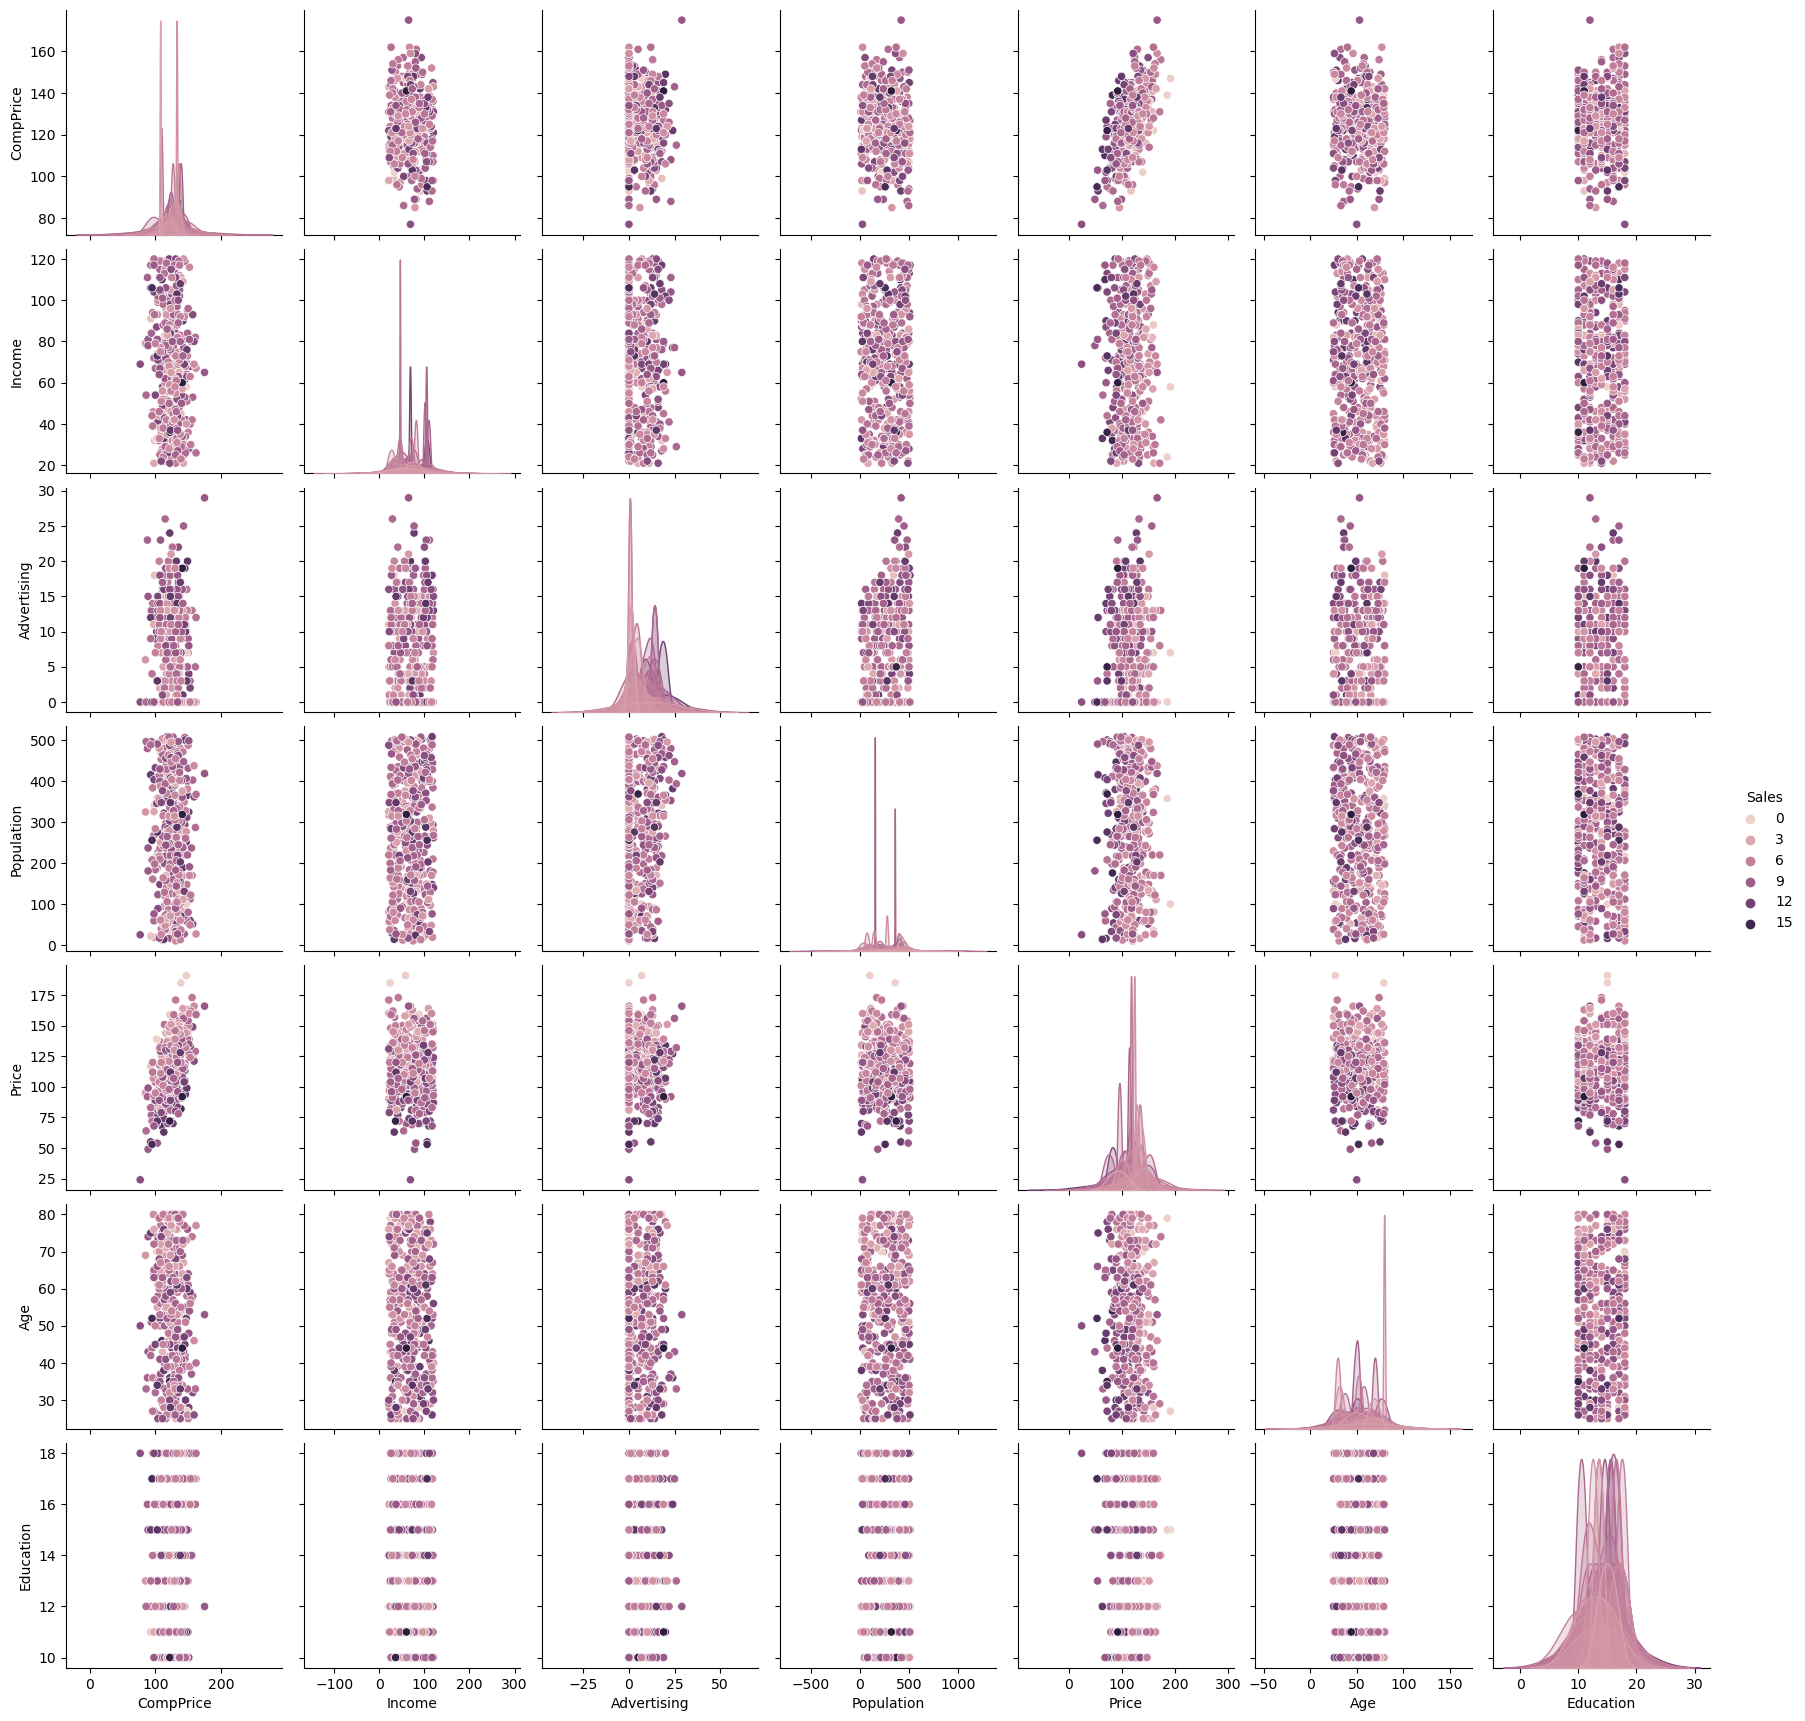

In [8]:
sns.pairplot(data=company, hue = 'Sales')

In [9]:
# craeting dummy variables 
company=pd.get_dummies(company,columns=['Urban','US'], drop_first=True)
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [10]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [11]:
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1
399,9.71,134,37,0,27,120,Good,49,16,1,1


In [12]:
company['ShelveLoc']=company['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [13]:
x=company.iloc[:,1:10] 
y=company["Sales"]

In [14]:
x = np.array(company.iloc[:,1:7] )
x

array([[138,  73,  11, 276, 120,   3],
       [111,  48,  16, 260,  83,   1],
       [113,  35,  10, 269,  80,   2],
       ...,
       [162,  26,  12, 368, 159,   2],
       [100,  79,   7, 284,  95,   3],
       [134,  37,   0,  27, 120,   1]], dtype=int64)

In [15]:
x

array([[138,  73,  11, 276, 120,   3],
       [111,  48,  16, 260,  83,   1],
       [113,  35,  10, 269,  80,   2],
       ...,
       [162,  26,  12, 368, 159,   2],
       [100,  79,   7, 284,  95,   3],
       [134,  37,   0,  27, 120,   1]], dtype=int64)

In [16]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [17]:
company['Sales'].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [18]:
company.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [19]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [20]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,2.027500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,1.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,2.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,3.000000,80.000000,18.000000,1.000000,1.000000


In [21]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [22]:
y = np.array(company.Sales)
y.shape

(400,)

In [23]:
# Converting the 1D-array to 2D-array
y = y.reshape(-1, 1)
y

array([[ 9.5 ],
       [11.22],
       [10.06],
       [ 7.4 ],
       [ 4.15],
       [10.81],
       [ 6.63],
       [11.85],
       [ 6.54],
       [ 4.69],
       [ 9.01],
       [11.96],
       [ 3.98],
       [10.96],
       [11.17],
       [ 8.71],
       [ 7.58],
       [12.29],
       [13.91],
       [ 8.73],
       [ 6.41],
       [12.13],
       [ 5.08],
       [ 5.87],
       [10.14],
       [14.9 ],
       [ 8.33],
       [ 5.27],
       [ 2.99],
       [ 7.81],
       [13.55],
       [ 8.25],
       [ 6.2 ],
       [ 8.77],
       [ 2.67],
       [11.07],
       [ 8.89],
       [ 4.95],
       [ 6.59],
       [ 3.24],
       [ 2.07],
       [ 7.96],
       [10.43],
       [ 4.12],
       [ 4.16],
       [ 4.56],
       [12.44],
       [ 4.38],
       [ 3.91],
       [10.61],
       [ 1.42],
       [ 4.42],
       [ 7.91],
       [ 6.92],
       [ 4.9 ],
       [ 6.85],
       [11.91],
       [ 0.91],
       [ 5.42],
       [ 5.21],
       [ 8.32],
       [ 7.32],
       [

In [24]:
# Split the data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [25]:
print('Training x Shape:', x_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing x Shape:', x_test.shape)
print('Testing y Shape:', y_test.shape)

Training x Shape: (300, 6)
Training y Shape: (300, 1)
Testing x Shape: (100, 6)
Testing y Shape: (100, 1)


In [63]:
rfr = RandomForestRegressor(n_estimators=1000, random_state=42)
rfr.fit(x_train,y_train)

C:\Users\HP\AppData\Local\Temp\ipykernel_10160\3296878375.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [64]:
rfr.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=1608637542),
 DecisionTreeRegressor(max_features='auto', random_state=1273642419),
 DecisionTreeRegressor(max_features='auto', random_state=1935803228),
 DecisionTreeRegressor(max_features='auto', random_state=787846414),
 DecisionTreeRegressor(max_features='auto', random_state=996406378),
 DecisionTreeRegressor(max_features='auto', random_state=1201263687),
 DecisionTreeRegressor(max_features='auto', random_state=423734972),
 DecisionTreeRegressor(max_features='auto', random_state=415968276),
 DecisionTreeRegressor(max_features='auto', random_state=670094950),
 DecisionTreeRegressor(max_features='auto', random_state=1914837113),
 DecisionTreeRegressor(max_features='auto', random_state=669991378),
 DecisionTreeRegressor(max_features='auto', random_state=429389014),
 DecisionTreeRegressor(max_features='auto', random_state=249467210),
 DecisionTreeRegressor(max_features='auto', random_state=1972458954),
 DecisionTreeRegressor(max_f

In [65]:
rfr.n_features_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


6

In [66]:
rfr.n_outputs_

1

In [48]:
# Using KFold and Cross validation score 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [49]:
kfold = KFold(n_splits=10, random_state=42,shuffle = True)
kfold

KFold(n_splits=10, random_state=42, shuffle=True)

In [50]:
model = RandomForestRegressor(n_estimators=100, max_features=3)
model

RandomForestRegressor(max_features=3)

In [51]:
results = cross_val_score(model, x, y, cv=kfold)
results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

array([0.70537577, 0.73078714, 0.68398354, 0.64617075, 0.77462638,
       0.54297284, 0.65282219, 0.49074129, 0.67073655, 0.66987185])

In [52]:
print(results.mean()) 

0.6568088293734823


In [67]:
# Use the forest's predict method on the test data
predictions = rfr.predict(x_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.') 

Mean Absolute Error: 2.99 degrees.


In [68]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: 48.92 %.


In [69]:
# Predictions on train data
pred_train = rfr.predict(x_train)
pred_train

array([ 4.50941,  8.38701,  8.2844 ,  9.09054,  6.20965, 11.82313,
        8.67962,  6.90688,  7.20816,  9.33114,  7.13742,  8.81484,
       12.54794,  5.60685,  4.6099 ,  7.64622,  8.75296,  7.35038,
        7.22551, 10.90147,  9.96069,  8.73426, 11.55428,  7.66229,
        8.77383,  6.86949, 10.32524,  6.29554,  7.10224, 10.23943,
        5.84891,  8.68861,  5.05828, 10.52723,  7.33101,  7.16072,
       10.5682 ,  5.0761 ,  9.21562,  5.73064,  9.43995, 11.70981,
        7.06572,  8.50689,  4.20663,  6.47971,  5.70054,  6.32808,
        1.71343,  9.71098,  6.45709,  5.69298,  6.17434, 10.12489,
        7.73114,  7.27497,  5.53598,  7.83776, 14.21573,  5.65373,
        7.52574,  7.62783,  7.37362,  7.44695,  9.30332,  7.68966,
        7.14063,  5.68529, 10.55963,  5.21004,  5.14258,  8.12854,
        7.45824,  9.83828,  1.59058,  5.6326 ,  7.24672,  7.85338,
       12.25307,  5.96441,  5.51469,  9.26107,  6.62088,  4.61407,
        8.84276,  4.19795,  3.17323, 10.84294,  7.12418,  4.47

In [70]:
from sklearn.metrics import r2_score
print(r2_score(y_train,pred_train)) 

0.9500813440405612


In [71]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, pred_train)
print('Mean squared error: ', mse)

Mean squared error:  0.3742387291766709


In [72]:
# Prediction on test data
pred_test = rfr.predict(x_test)
pred_test

array([ 6.64885,  4.19368,  9.8785 ,  5.36936,  9.28415,  4.65211,
       10.70857,  7.6609 , 11.53882,  9.48535,  6.94714,  8.85386,
        9.65275,  5.93423,  8.06566,  8.48259,  5.49419, 12.04014,
        7.17389,  6.59291,  9.80388,  6.7002 ,  7.17603,  5.03168,
        6.35239,  7.17708,  6.7178 ,  5.98679,  6.55974,  4.39882,
       11.04694, 10.86036,  5.9183 ,  3.84478, 10.66784,  6.50686,
        5.26475,  8.90583,  9.68325,  4.18335,  5.17353,  4.99791,
       10.67778, 10.77377,  8.35434,  7.27112,  7.08912,  8.95944,
        4.94997,  6.95504, 10.75183,  7.05807,  6.3468 , 10.45127,
        7.74429,  3.3013 ,  5.60424, 10.08135, 11.2738 ,  9.44901,
        9.07058, 10.37517,  8.81715,  5.06666,  7.34262,  8.0488 ,
       11.08085,  7.0676 ,  5.54443, 10.31541,  5.91122,  6.81388,
        9.81221,  3.38827, 10.00567,  8.22412,  6.96408,  9.02016,
        5.67352,  6.34748,  7.09407, 13.65337,  4.16118,  7.39349,
        7.30005,  8.09857,  6.38057,  8.86005,  5.15061,  6.34

In [73]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_test)) 

0.7052130511051202


In [74]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred_test)
print('Mean squared error: ', mse)

Mean squared error:  2.71595727990002
